In [1]:
import warnings
warnings.simplefilter('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import random
import heapq
import numpy as np
import scipy as sp

maps = {0.01: 0.0010,
        0.02: 0.0009,
        0.03: 0.0008,
        0.04: 0.0007,
        0.05: 0.0006,
        0.06: 0.0005}


class Bicycle(object):
    """ class to simulate the usage of shared bicycles """
    def __init__(self, num_bike, rate, seed=None):
        """
        :param num_bike:
        :param rate:
        :param seed:
        """
        random.seed(seed)
        np.random.seed(seed)
        self.num_bike = num_bike
        self.rate = rate
        self.free_student = 50000
        self.free_bike = num_bike
        self.percent = maps[rate]
        self.cost = 1 * self.num_bike
        self.bike_usage_prob = 0.5
        self.usage_duration = 0

    def simulate(self):
        # from 9:00 am to 6:00 pm, every 5 minutes
        pq = []
        for t in range(0, 540, 5):
            while len(pq) and pq[0] <= t:
                heapq.heappop(pq)
                self.free_student += 1
                self.free_bike += 1
                
            mean = self.free_student * self.percent
            willing_student = min(self.sample_student(mean), self.free_bike)
            usage_student = self.sample_bicycle(willing_student)
            self.free_student -= usage_student
            self.free_bike -= usage_student
            usage_time = self.sample_duration(usage_student)
            self.usage_duration += np.sum(usage_time)
            for tmp_t in usage_time:
                heapq.heappush(pq, tmp_t + t)
                
        return self.usage_duration * self.rate - self.cost
            

    def sample_student(self, mean):
        """ function to sample the number of students who are willing to take the bike
            assume it follows poisson distribution
        """
        return np.random.poisson(mean)
        
    def sample_duration(self, size):
        """ function to sample the duration of trips """
        times = [5, 10, 15, 20, 25, 30]
        prob = [0.3, 0.3, 0.2, 0.1, 0.05, 0.05]
        
        return np.random.choice(times, size=size, replace=True, p=prob)

    def sample_bicycle(self, n):
        """ function to sample the actually used bicycles with binomial distribution """
        return np.random.binomial(n, p=self.bike_usage_prob)

In [3]:
bike = Bicycle(num_bike=100, rate=0.04, seed=None)
bike.simulate()

809.2

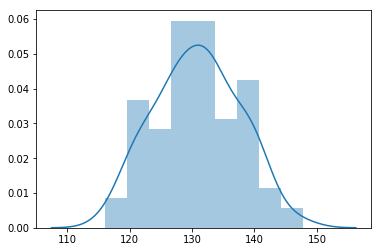

In [4]:
profit = []
for i in range(100):
    bike = Bicycle(num_bike=200, rate=0.01, seed=None)
    profit.append(bike.simulate())

# visualization
fig, ax = plt.subplots()
sns.distplot(profit, ax=ax)
plt.show()

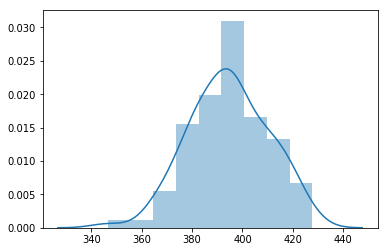

In [5]:
profit = []
for i in range(100):
    bike = Bicycle(num_bike=200, rate=0.02, seed=None)
    profit.append(bike.simulate())

# visualization
fig, ax = plt.subplots()
sns.distplot(profit, ax=ax)
plt.show()

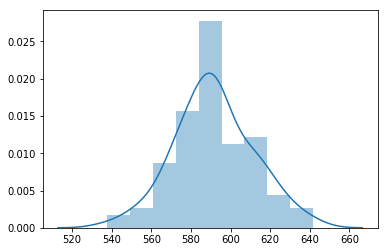

In [6]:
profit = []
for i in range(100):
    bike = Bicycle(num_bike=200, rate=0.03, seed=None)
    profit.append(bike.simulate())

# visualization
fig, ax = plt.subplots()
sns.distplot(profit, ax=ax)
plt.show()

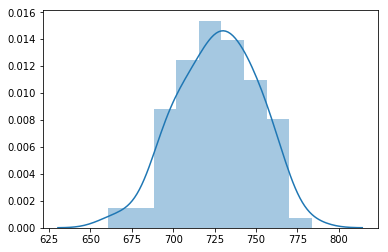

In [7]:
profit = []
for i in range(100):
    bike = Bicycle(num_bike=200, rate=0.04, seed=None)
    profit.append(bike.simulate())

# visualization
fig, ax = plt.subplots()
sns.distplot(profit, ax=ax)
plt.show()

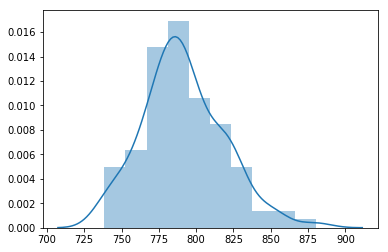

In [8]:
profit = []
for i in range(100):
    bike = Bicycle(num_bike=200, rate=0.05, seed=None)
    profit.append(bike.simulate())

# visualization
fig, ax = plt.subplots()
sns.distplot(profit, ax=ax)
plt.show()

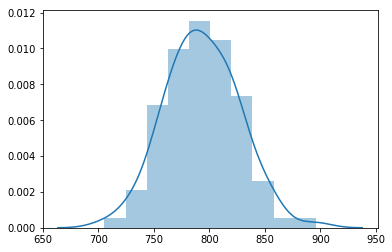

In [9]:
profit = []
for i in range(100):
    bike = Bicycle(num_bike=200, rate=0.06, seed=None)
    profit.append(bike.simulate())

# visualization
fig, ax = plt.subplots()
sns.distplot(profit, ax=ax)
plt.show()